In [33]:
import os
import re
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

In [ ]:
sns.color_palette('deep')
sns.set_style('white')

LINEWIDTH = 1.5

In [ ]:
# code for contents of plot

# filename = "training_results_com_2tran_LNAV_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv"


def read_train_file(filename):
    workdir = os.getcwd()
    path = os.path.relpath('..\\..\\..\\results\\training_results\\', workdir)

    file = os.path.join(path, filename)

    data = []

    limit = 5500
    count = 0

    with open(file) as f:
        csvreader = csv.reader(f)
        keys = next(csvreader)

        result = dict.fromkeys(keys)

        first = True

        for row in csvreader:
            if first:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key] = [int(item)]
                    else:
                        try:
                            result[key] = [float(item)]
                        except ValueError:
                            result[key] = [item]
                first = False
            else:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key].append(int(item))
                    else:
                        try:
                            result[key].append(float(item))
                        except ValueError:
                            result[key].append(item)

            count += 1

            if count > limit:
                break

    return result

## Loss

In [ ]:
def loss_train(filename, result):  #, loss_indices_dict, loss_data_dict):
    loss_indices_dict = {}
    loss_data_dict = {}

    for f in list(result.keys()):
        loss_indices_dict[f] = [i for i, j in enumerate(result[f]['loss']) if j != ""]
        loss_data_dict[f] = [result[f]['loss'][x] for x in loss_indices_dict[f]]

    loss_indices = list(loss_indices_dict.values())
    loss_data = list(loss_data_dict.values())

    fig, axs = plt.subplots(2, 3, figsize=(10,6), sharey=True)
    fig.suptitle(filename, fontsize=16)

    sns.lineplot(x=loss_indices[0][20:], y=loss_data[0][20:], linewidth=LINEWIDTH, ax=axs[0, 0])
    running_avg = uniform_filter1d(loss_data[0][20:], 20)
    sns.lineplot(x=loss_indices[0][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[0, 0])
    axs[0, 0].set_title(list(result.keys())[0])
    sns.lineplot(x=loss_indices[1][20:], y=loss_data[1][20:], linewidth=LINEWIDTH, ax=axs[0, 1])
    running_avg = uniform_filter1d(loss_data[1][20:], 20)
    sns.lineplot(x=loss_indices[1][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[0, 1])
    axs[0, 1].set_title(list(result.keys())[1])
    sns.lineplot(x=loss_indices[2][20:], y=loss_data[2][20:], linewidth=LINEWIDTH, ax=axs[0, 2])
    running_avg = uniform_filter1d(loss_data[2][20:], 20)
    sns.lineplot(x=loss_indices[2][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[0, 2])
    axs[0, 2].set_title(list(result.keys())[2])
    sns.lineplot(x=loss_indices[3][20:], y=loss_data[3][20:], linewidth=LINEWIDTH, ax=axs[1, 0])
    running_avg = uniform_filter1d(loss_data[3][20:], 20)
    sns.lineplot(x=loss_indices[3][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[1, 0])
    axs[1, 0].set_title(list(result.keys())[3])
    sns.lineplot(x=loss_indices[4][20:], y=loss_data[4][20:], linewidth=LINEWIDTH, ax=axs[1, 1])
    running_avg = uniform_filter1d(loss_data[4][20:], 20)
    sns.lineplot(x=loss_indices[4][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[1, 1])
    axs[1, 1].set_title(list(result.keys())[4])
    sns.lineplot(x=loss_indices[5][20:], y=loss_data[5][20:], linewidth=LINEWIDTH, ax=axs[1, 2])
    running_avg = uniform_filter1d(loss_data[5][20:], 20)
    sns.lineplot(x=loss_indices[5][20:], y=running_avg, linewidth=LINEWIDTH, ax=axs[1, 2])
    axs[1, 2].set_title(list(result.keys())[5])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Loss')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(b=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    plt.savefig("loss_train_"+ filename + ".pdf")

    plt.show()

## Reward

In [ ]:
def reward_train(filename, result_dict):
    result = list(result_dict.values())

    fig, axs = plt.subplots(2, 3, figsize=(10,6), sharey=True)
    fig.suptitle(filename, fontsize=16)

    sns.lineplot(data=result[0]['average reward'], linewidth=LINEWIDTH, ax=axs[0, 0])
    running_avg = uniform_filter1d(result[0]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 0])
    axs[0, 0].set_title(list(result_dict.keys())[0])
    sns.lineplot(data=result[1]['average reward'], linewidth=LINEWIDTH, ax=axs[0, 1])
    running_avg = uniform_filter1d(result[1]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 1])
    axs[0, 1].set_title(list(result_dict.keys())[1])
    sns.lineplot(data=result[2]['average reward'], linewidth=LINEWIDTH, ax=axs[0, 2])
    running_avg = uniform_filter1d(result[2]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 2])
    axs[0, 2].set_title(list(result_dict.keys())[2])
    sns.lineplot(data=result[3]['average reward'], linewidth=LINEWIDTH, ax=axs[1, 0])
    running_avg = uniform_filter1d(result[3]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 0])
    axs[1, 0].set_title(list(result_dict.keys())[3])
    sns.lineplot(data=result[4]['average reward'], linewidth=LINEWIDTH, ax=axs[1, 1])
    running_avg = uniform_filter1d(result[4]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 1])
    axs[1, 1].set_title(list(result_dict.keys())[4])
    sns.lineplot(data=result[5]['average reward'], linewidth=LINEWIDTH, ax=axs[1, 2])
    running_avg = uniform_filter1d(result[5]['average reward'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 2])
    axs[1, 2].set_title(list(result_dict.keys())[5])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Reward')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(b=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    plt.savefig("rewards_train_"+ filename + ".pdf")

    plt.show()

## Action Distribution

In [ ]:
def action_train(filename, result):
    actions_dict = {}
    for f in list(result.keys()):
        actions_dict[f] = {'LEFT': result[f]['action LEFT'], 'RIGHT': result[f]['action RIGHT'], 'LNAV': result[f]['action LNAV']}

    actions = list(actions_dict.values())

    fig, axs = plt.subplots(2, 3, figsize=(10,6), sharey=True)
    fig.suptitle(filename, fontsize=16)

    sns.lineplot(data=actions[0], linewidth=LINEWIDTH, ax=axs[0, 0])
    axs[0, 0].set_title(list(result.keys())[0])
    sns.lineplot(data=actions[1], linewidth=LINEWIDTH, ax=axs[0, 1])
    axs[0, 1].set_title(list(result.keys())[1])
    sns.lineplot(data=actions[2], linewidth=LINEWIDTH, ax=axs[0, 2])
    axs[0, 2].set_title(list(result.keys())[2])
    sns.lineplot(data=actions[3], linewidth=LINEWIDTH, ax=axs[1, 0])
    axs[1, 0].set_title(list(result.keys())[3])
    sns.lineplot(data=actions[4], linewidth=LINEWIDTH, ax=axs[1, 1])
    axs[1, 1].set_title(list(result.keys())[4])
    sns.lineplot(data=actions[5], linewidth=LINEWIDTH, ax=axs[1, 2])
    axs[1, 2].set_title(list(result.keys())[5])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Count')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(b=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    plt.savefig("actions_train_"+ filename + ".pdf")

    plt.show()

## Loss of Separation

In [37]:
def separation_train(filename, result):
    data_dict = {}

    for f in list(result.keys()):
        data_dict[f] = {"conflicts": result[f]['conflicts'], "LoS": result[f]['LoS']}

    data = list(data_dict.values())

    fig, axs = plt.subplots(2, 3, figsize=(10,6), sharey=True)
    fig.suptitle(filename, fontsize=16)

    sns.lineplot(data=data[0], linewidth=LINEWIDTH, ax=axs[0, 0])
    running_avg = uniform_filter1d(data[0]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 0], color="darkgrey")
    axs[0, 0].set_title(list(result.keys())[0])
    sns.lineplot(data=data[1], linewidth=LINEWIDTH, ax=axs[0, 1])
    running_avg = uniform_filter1d(data[1]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 1], color="darkgrey")
    axs[0, 1].set_title(list(result.keys())[1])
    sns.lineplot(data=data[2], linewidth=LINEWIDTH, ax=axs[0, 2])
    running_avg = uniform_filter1d(data[2]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 2], color="darkgrey")
    axs[0, 2].set_title(list(result.keys())[2])
    sns.lineplot(data=data[3], linewidth=LINEWIDTH, ax=axs[1, 0])
    running_avg = uniform_filter1d(data[3]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 0], color="darkgrey")
    axs[1, 0].set_title(list(result.keys())[3])
    sns.lineplot(data=data[4], linewidth=LINEWIDTH, ax=axs[1, 1])
    running_avg = uniform_filter1d(data[4]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 1], color="darkgrey")
    axs[1, 1].set_title(list(result.keys())[4])
    sns.lineplot(data=data[5], linewidth=LINEWIDTH, ax=axs[1, 2])
    running_avg = uniform_filter1d(data[5]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 2], color="darkgrey")
    axs[1, 2].set_title(list(result.keys())[5])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Conflict/LoS')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(b=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    plt.savefig("conflicts_train_" + filename + ".pdf")

    plt.show()

## Validation results

In [39]:
def read_val_file(filename):
    workdir = os.getcwd()
    path = os.path.relpath('..\\..\\..\\results\\validation_results\\', workdir)
    file = os.path.join(path, filename)

    data = []

    with open(file) as f:
        csvreader = csv.reader(f)
        keys = next(csvreader)

        result = dict.fromkeys(keys)

        first = True

        for row in csvreader:

            if first:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key] = [int(item)]
                    else:
                        try:
                            result[key] = [float(item)]
                        except ValueError:
                            result[key] = [item]
                first = False
            else:
                for key, item in zip(keys, row):
                    if item.isdigit():
                        result[key].append(int(item))
                    else:
                        try:
                            result[key].append(float(item))
                        except ValueError:
                            result[key].append(item)

    return result

In [41]:
def reward_val(filename, result_dict):
    result = list(result_dict.values())

    fig, axs = plt.subplots(2, 3, figsize=(10,6), sharey=True)
    fig.suptitle("Validation " + filename, fontsize=16)

    sns.lineplot(data=result[0]['rewards'], linewidth=LINEWIDTH, ax=axs[0, 0])
    lower = np.array(result[0]['rewards']) - np.array(result[0]['rewardsstd'])
    upper = np.array(result[0]['rewards']) + np.array(result[0]['rewardsstd'])
    axs[0, 0].fill_between(np.array(result[0]['rewards']), lower, upper, alpha=.3)
    axs[0, 0].set_title(list(result_dict.keys())[0])
    sns.lineplot(data=result[1]['rewards'], linewidth=LINEWIDTH, ax=axs[0, 1])
    lower = np.array(result[1]['rewards']) - np.array(result[1]['rewardsstd'])
    upper = np.array(result[1]['rewards']) + np.array(result[1]['rewardsstd'])
    axs[0, 1].fill_between(result[1]['rewards'], lower, upper, alpha=.3)
    axs[0, 1].set_title(list(result_dict.keys())[1])
    sns.lineplot(data=result[2]['rewards'], linewidth=LINEWIDTH, ax=axs[0, 2])
    lower = np.array(result[2]['rewards']) - np.array(result[2]['rewardsstd'])
    upper = np.array(result[2]['rewards']) + np.array(result[2]['rewardsstd'])
    axs[0, 2].fill_between(result[2]['rewards'], lower, upper, alpha=.3)
    axs[0, 2].set_title(list(result_dict.keys())[2])
    sns.lineplot(data=result[3]['rewards'], linewidth=LINEWIDTH, ax=axs[1, 0])
    lower = np.array(result[3]['rewards']) - np.array(result[3]['rewardsstd'])
    upper = np.array(result[3]['rewards']) + np.array(result[3]['rewardsstd'])
    axs[1, 0].fill_between(result[3]['rewards'], lower, upper, alpha=.3)
    axs[1, 0].set_title(list(result_dict.keys())[3])
    sns.lineplot(data=result[4]['rewards'], linewidth=LINEWIDTH, ax=axs[1, 1])
    lower = np.array(result[4]['rewards']) - np.array(result[4]['rewardsstd'])
    upper = np.array(result[4]['rewards']) + np.array(result[4]['rewardsstd'])
    axs[1, 1].fill_between(result[4]['rewards'], lower, upper, alpha=.3)
    axs[1, 1].set_title(list(result_dict.keys())[4])
    sns.lineplot(data=result[5]['rewards'], linewidth=LINEWIDTH, ax=axs[1, 2])
    lower = np.array(result[5]['rewards']) - np.array(result[5]['rewardsstd'])
    upper = np.array(result[5]['rewards']) + np.array(result[5]['rewardsstd'])
    axs[1, 2].fill_between(result[5]['rewards'], lower, upper, alpha=.3)
    axs[1, 2].set_title(list(result_dict.keys())[5])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Reward')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(b=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    plt.savefig("rewards_val" + filename + ".pdf")

    plt.show()

## Action Distribution

In [42]:
def action_val(filename, result):
    actions_dict = {}
    for f in list(result.keys()):
        actions_dict[f] = {'LEFT': result[f]['action LEFT'], 'RIGHT': result[f]['action RIGHT'], 'LNAV': result[f]['action LNAV']}

    actions = list(actions_dict.values())

    fig, axs = plt.subplots(2, 3, figsize=(10,6), sharey=True)
    fig.suptitle("Validation " + filename, fontsize=16)

    sns.lineplot(data=actions[0], linewidth=LINEWIDTH, ax=axs[0, 0])
    axs[0, 0].set_title(list(result.keys())[0])
    sns.lineplot(data=actions[1], linewidth=LINEWIDTH, ax=axs[0, 1])
    axs[0, 1].set_title(list(result.keys())[1])
    sns.lineplot(data=actions[2], linewidth=LINEWIDTH, ax=axs[0, 2])
    axs[0, 2].set_title(list(result.keys())[2])
    sns.lineplot(data=actions[3], linewidth=LINEWIDTH, ax=axs[1, 0])
    axs[1, 0].set_title(list(result.keys())[3])
    sns.lineplot(data=actions[4], linewidth=LINEWIDTH, ax=axs[1, 1])
    axs[1, 1].set_title(list(result.keys())[4])
    sns.lineplot(data=actions[5], linewidth=LINEWIDTH, ax=axs[1, 2])
    axs[1, 2].set_title(list(result.keys())[5])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Count')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(b=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    plt.savefig("actions_val" + filename + ".pdf")

    plt.show()

## Loss of Separation

In [43]:
def separation_val(filename, result):
    data_dict = {}

    for f in list(result.keys()):
        data_dict[f] = {"conflicts": result[f]['conflicts'], "LoS": result[f]['LoS']}

    data = list(data_dict.values())

    fig, axs = plt.subplots(2, 3, figsize=(10,6), sharey=True)
    fig.suptitle("Validation " + filename, fontsize=16)

    sns.lineplot(data=data[0], linewidth=LINEWIDTH, ax=axs[0, 0])
    running_avg = uniform_filter1d(data[0]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 0], color="darkgrey")
    axs[0, 0].set_title(list(result.keys())[0])
    sns.lineplot(data=data[1], linewidth=LINEWIDTH, ax=axs[0, 1])
    running_avg = uniform_filter1d(data[1]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 1], color="darkgrey")
    axs[0, 1].set_title(list(result.keys())[1])
    sns.lineplot(data=data[2], linewidth=LINEWIDTH, ax=axs[0, 2])
    running_avg = uniform_filter1d(data[2]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[0, 2], color="darkgrey")
    axs[0, 2].set_title(list(result.keys())[2])
    sns.lineplot(data=data[3], linewidth=LINEWIDTH, ax=axs[1, 0])
    running_avg = uniform_filter1d(data[3]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 0], color="darkgrey")
    axs[1, 0].set_title(list(result.keys())[3])
    sns.lineplot(data=data[4], linewidth=LINEWIDTH, ax=axs[1, 1])
    running_avg = uniform_filter1d(data[4]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 1], color="darkgrey")
    axs[1, 1].set_title(list(result.keys())[4])
    sns.lineplot(data=data[5], linewidth=LINEWIDTH, ax=axs[1, 2])
    running_avg = uniform_filter1d(data[5]['LoS'], 20)
    sns.lineplot(data=running_avg, linewidth=LINEWIDTH, ax=axs[1, 2], color="darkgrey")
    axs[1, 2].set_title(list(result.keys())[5])

    for ax in axs.flat:
        ax.set(xlabel='Episode', ylabel='Conflict/LoS')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for ax in axs.flat:
        ax.grid(b=True, which='major', color='#666666', linestyle='-')
        ax.minorticks_on()
        ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)

    plt.savefig("conflicts_train_" + filename + ".pdf")

    plt.show()

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


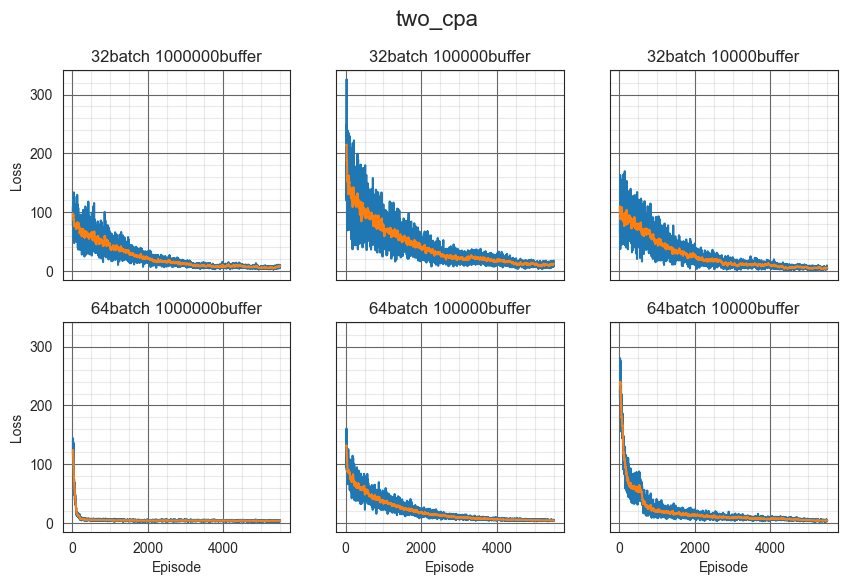

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


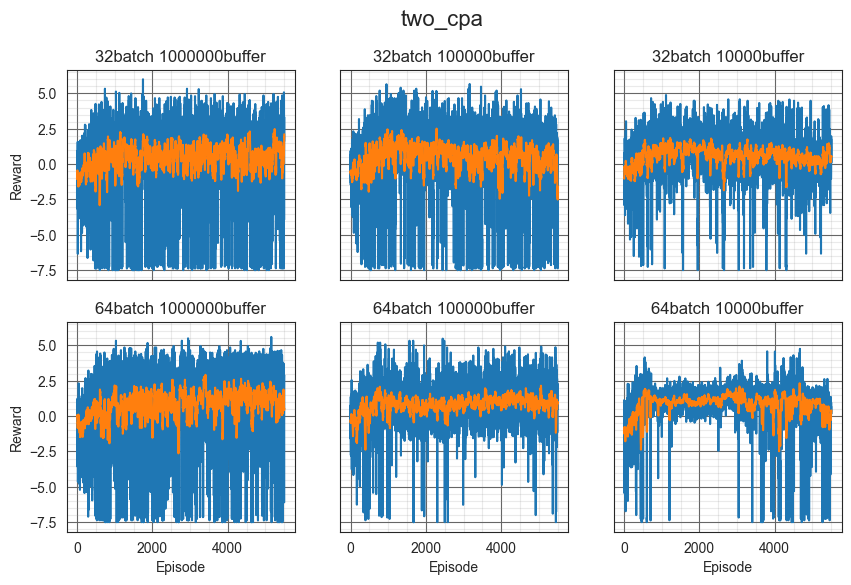

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


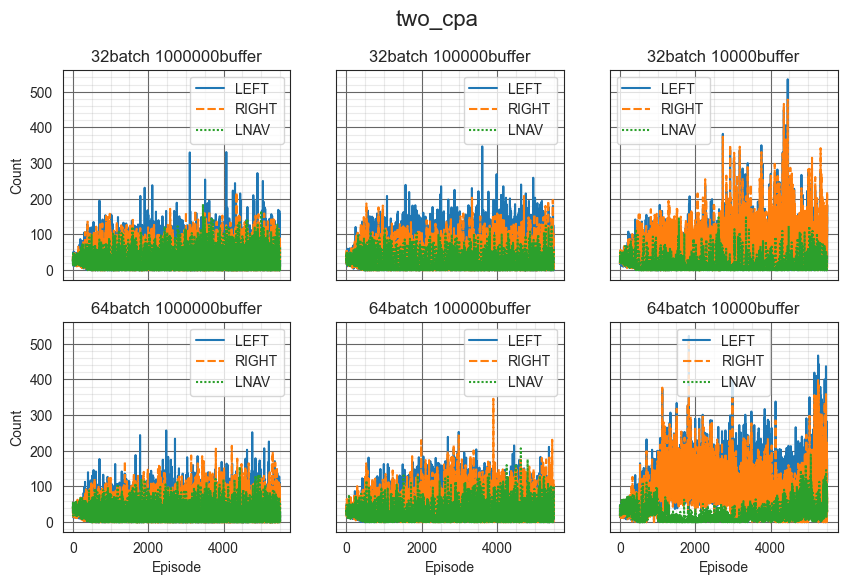

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


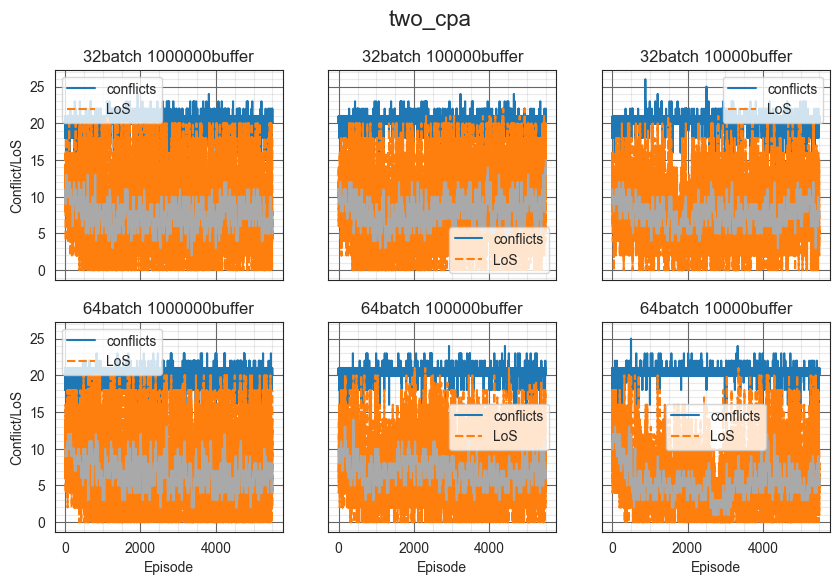

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


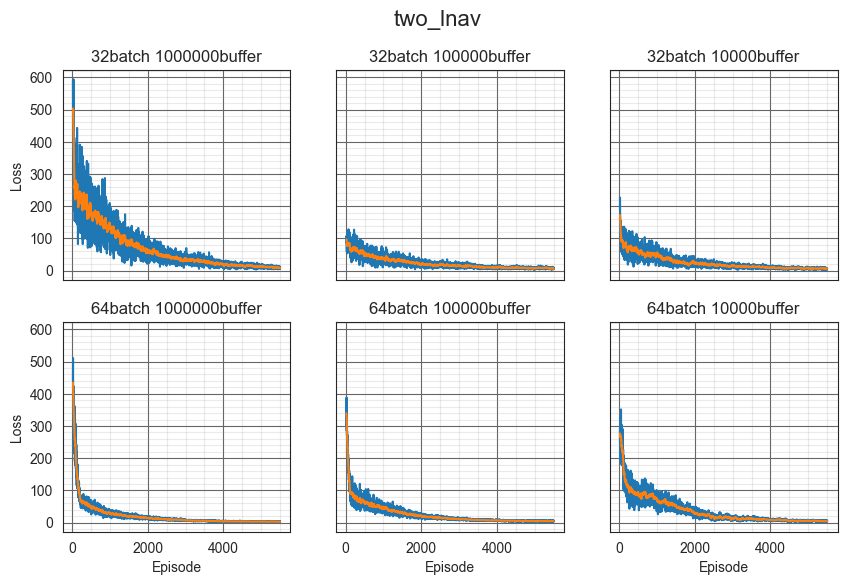

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


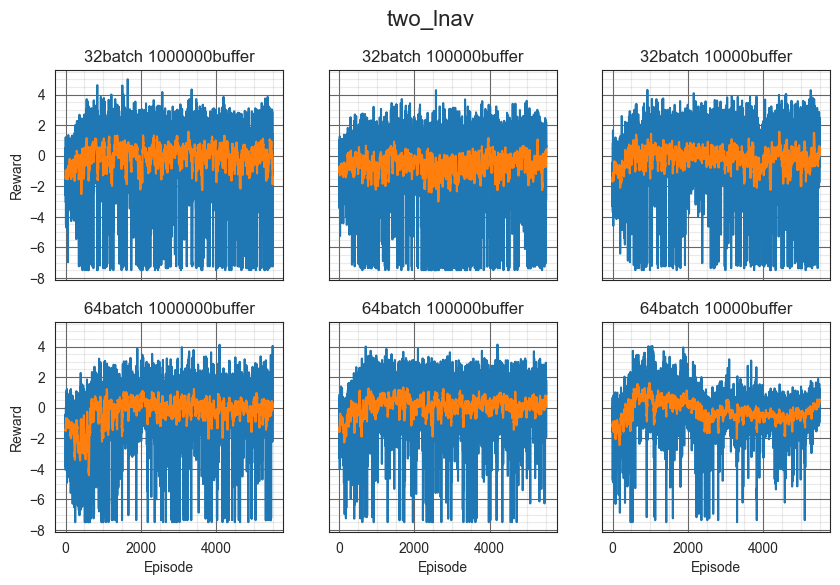

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


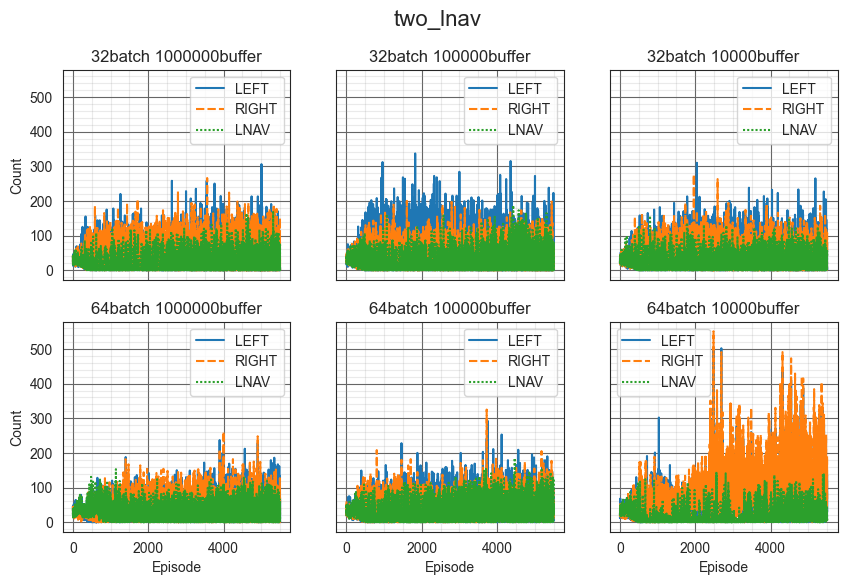

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


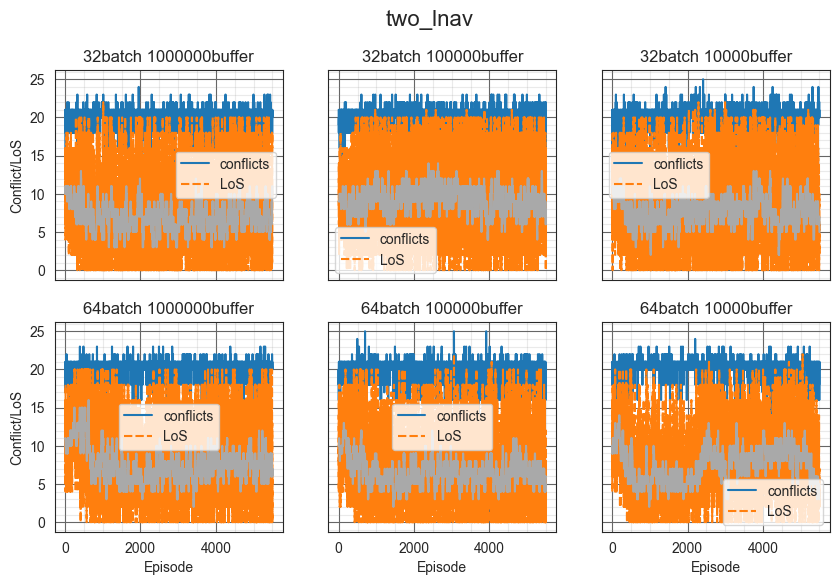

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


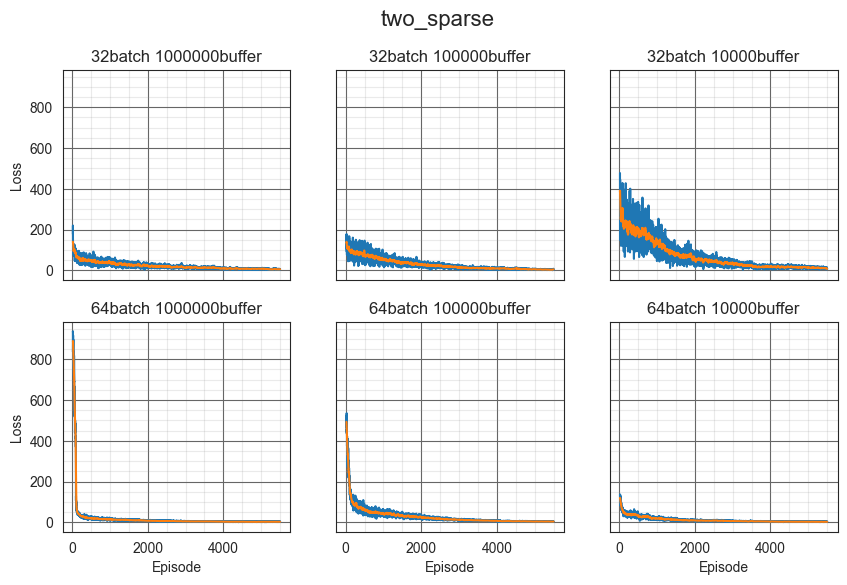

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


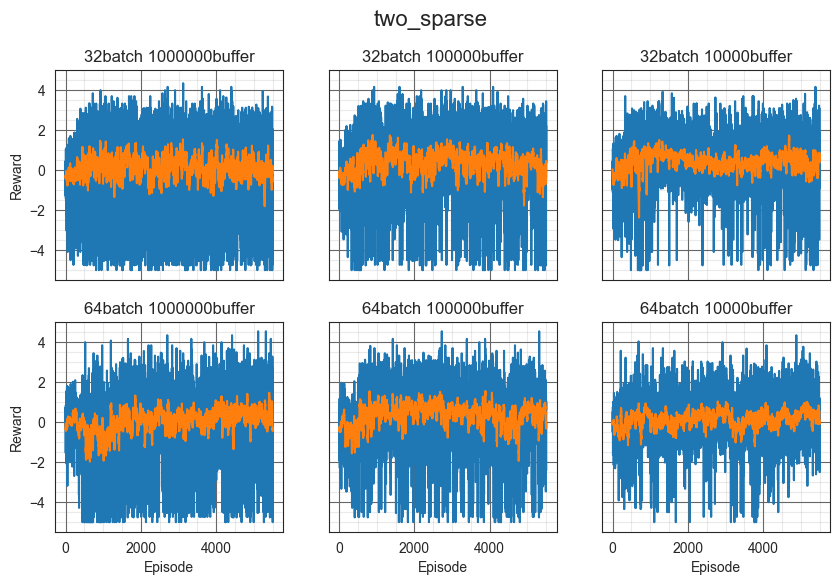

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


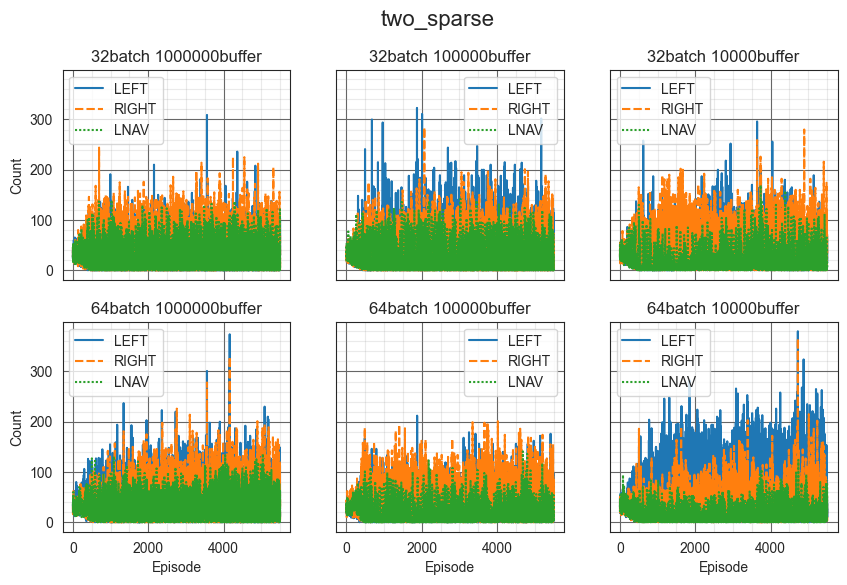

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


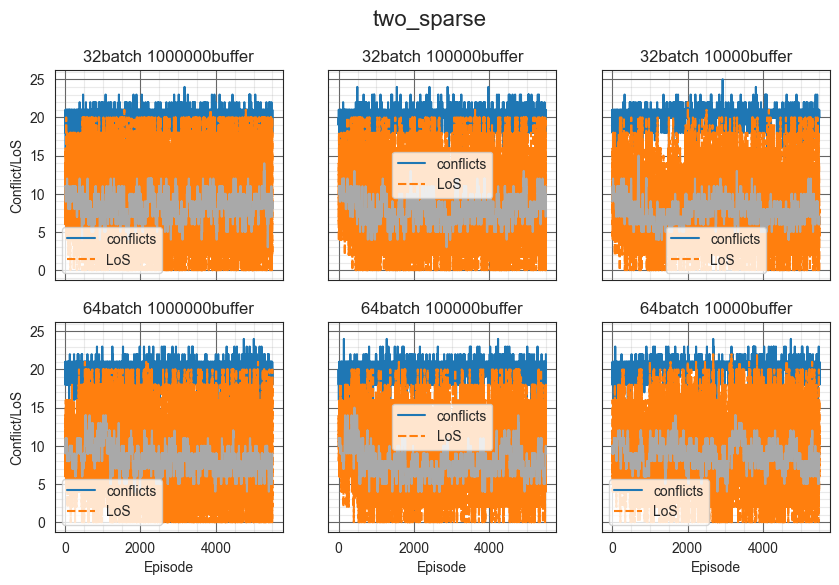

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


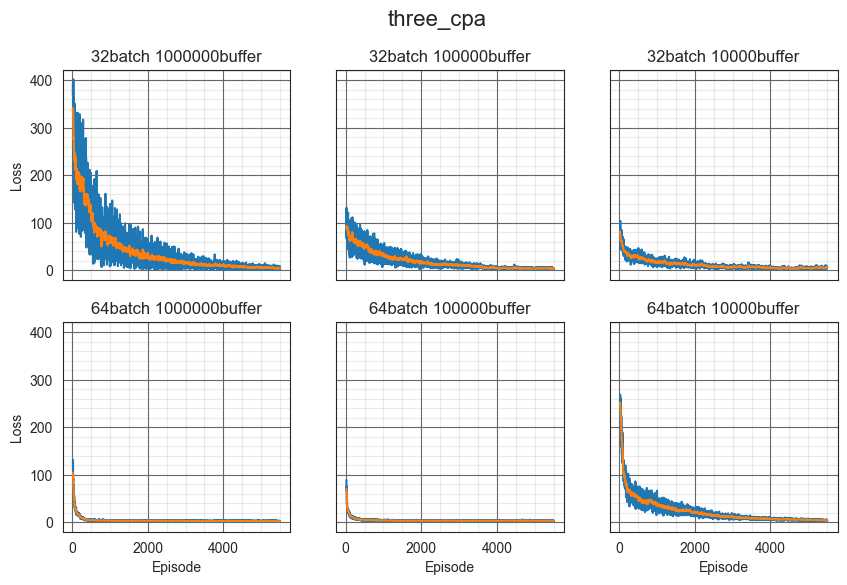

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


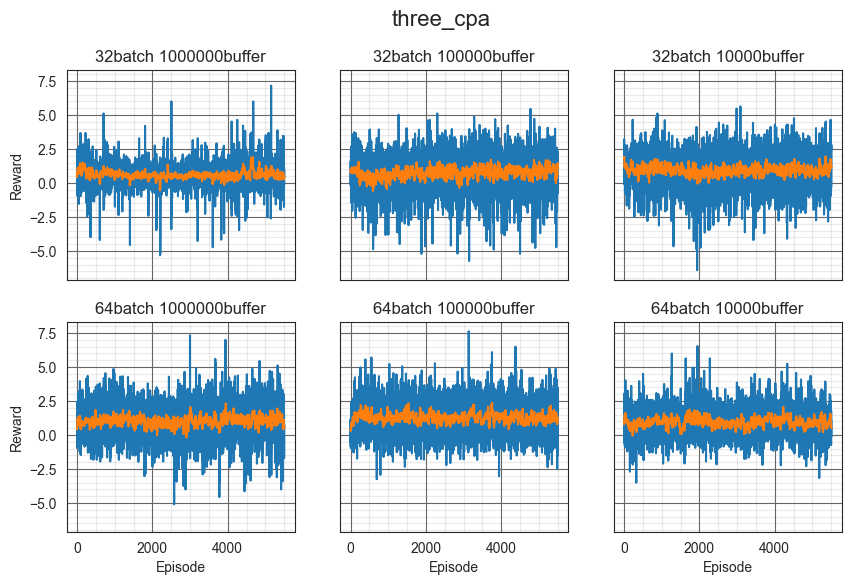

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


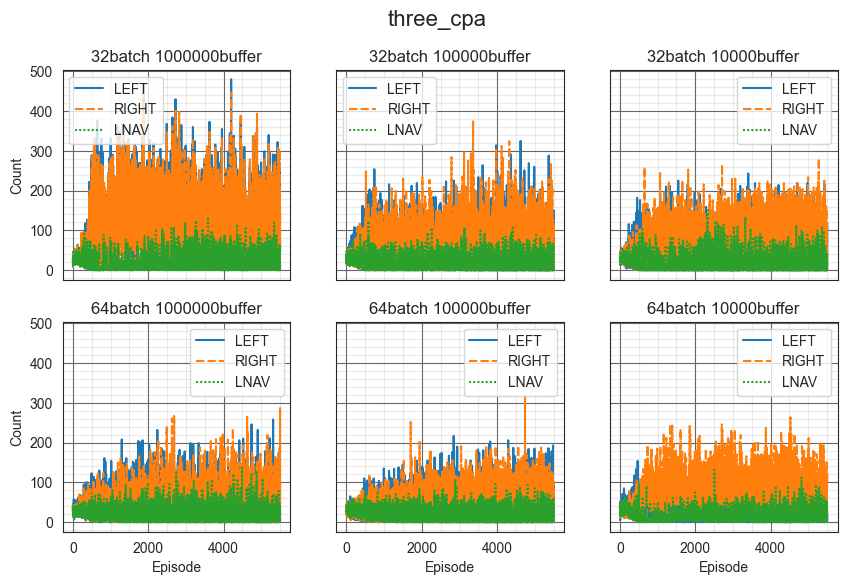

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


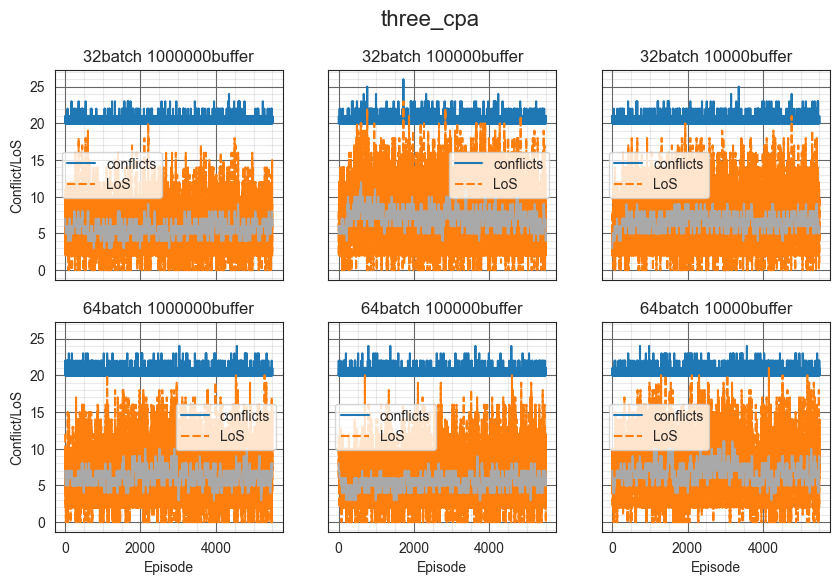

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


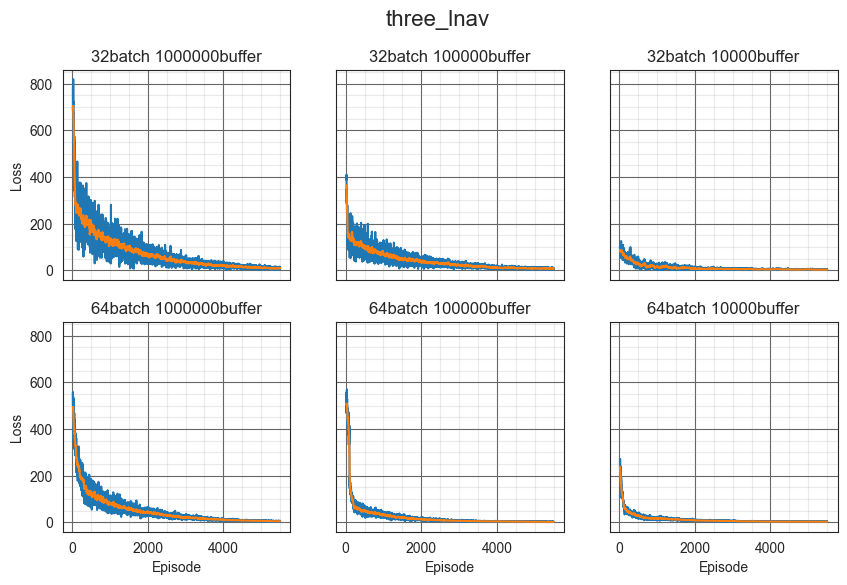

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


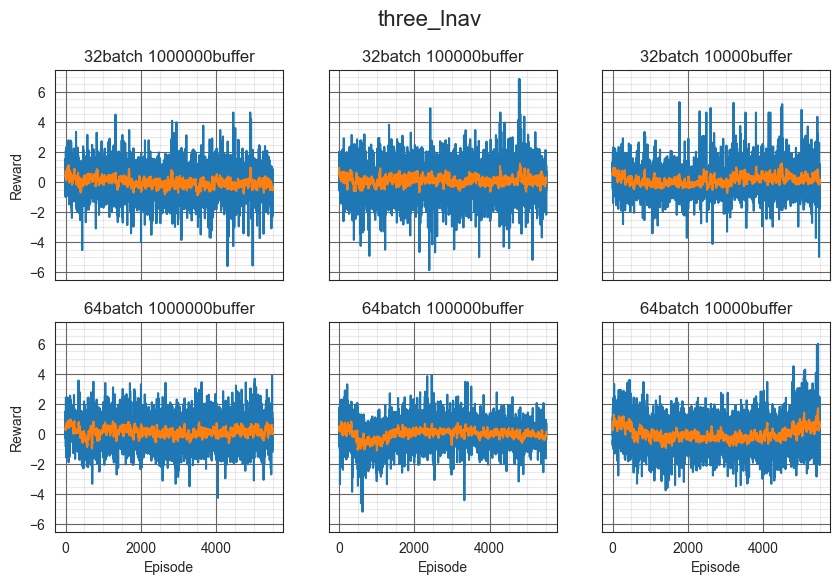

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


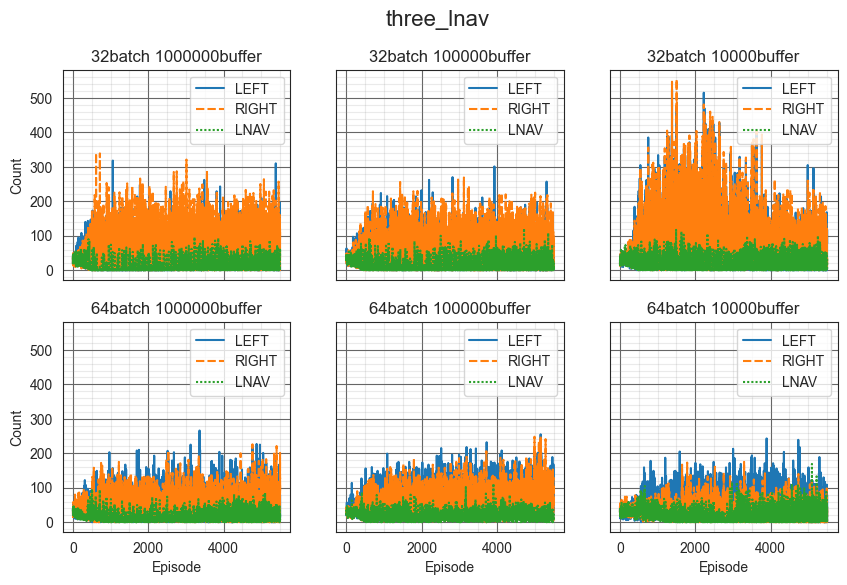

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


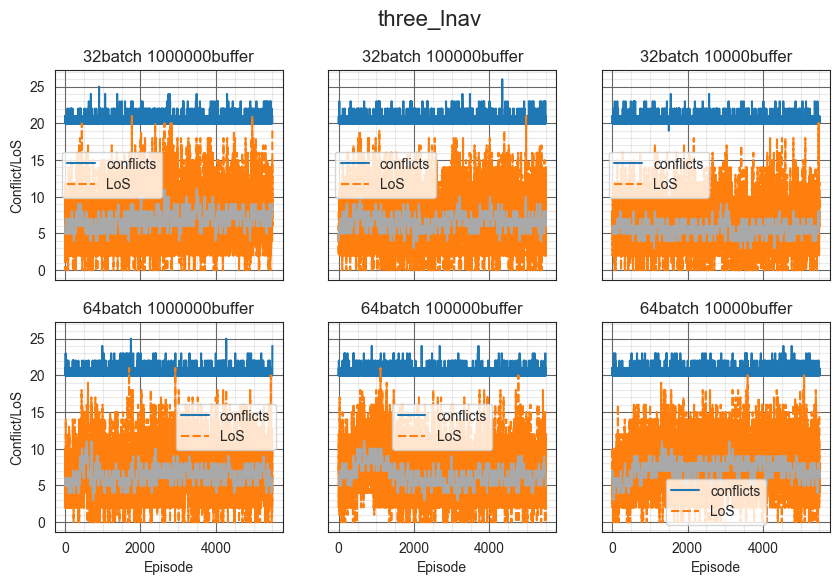

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1062894446.py:50: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


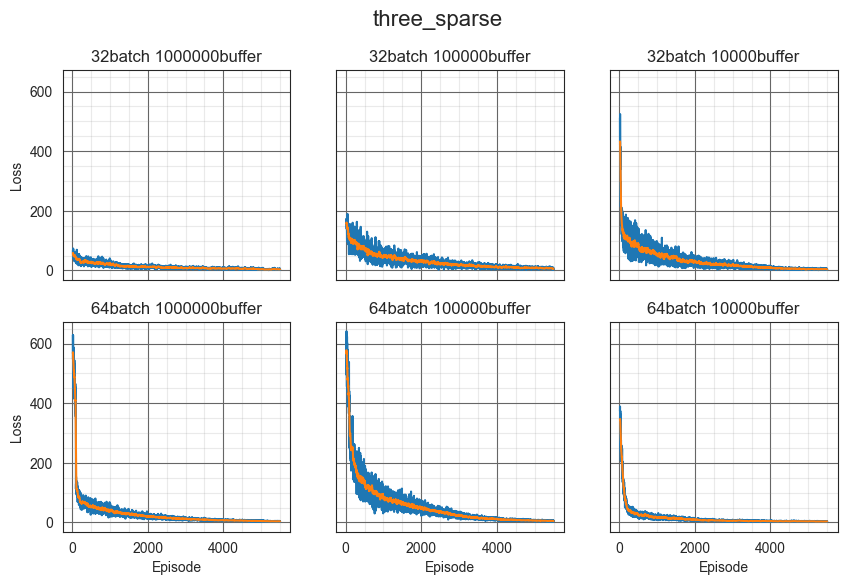

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\1956197477.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


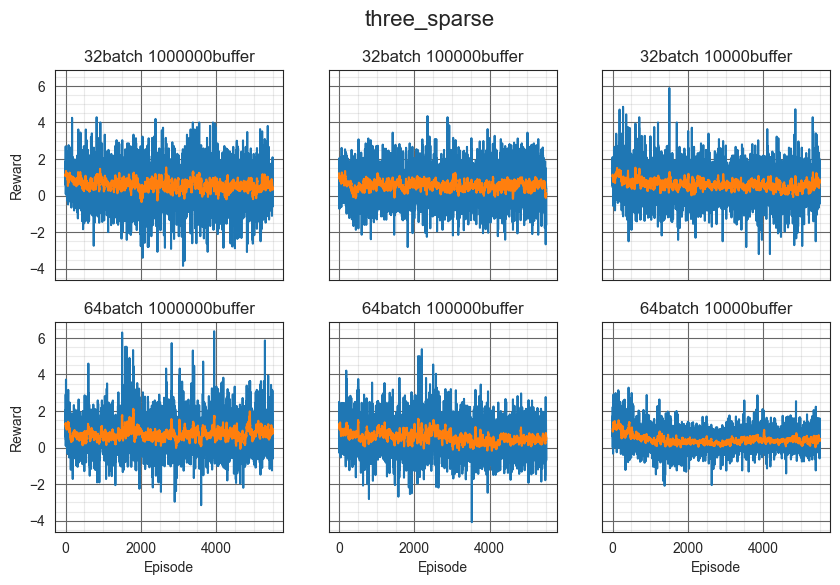

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2104010577.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


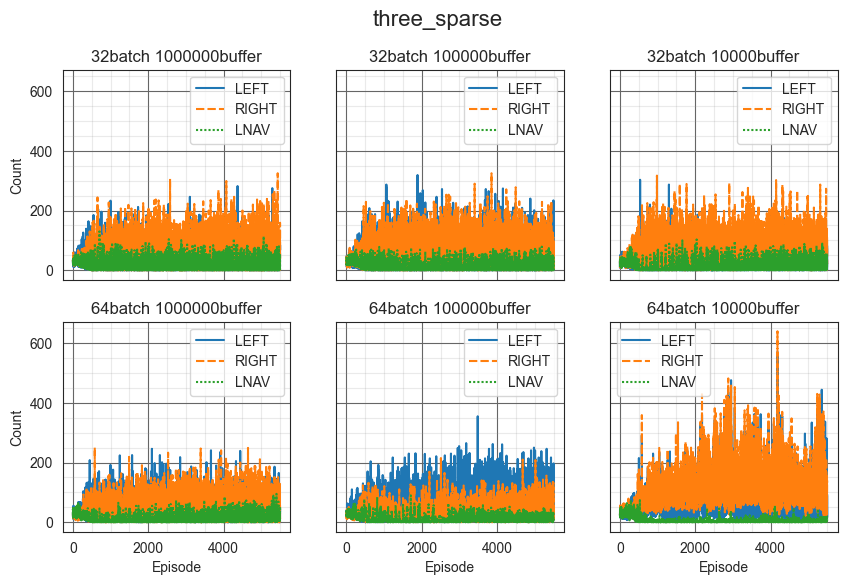

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\2056189643.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


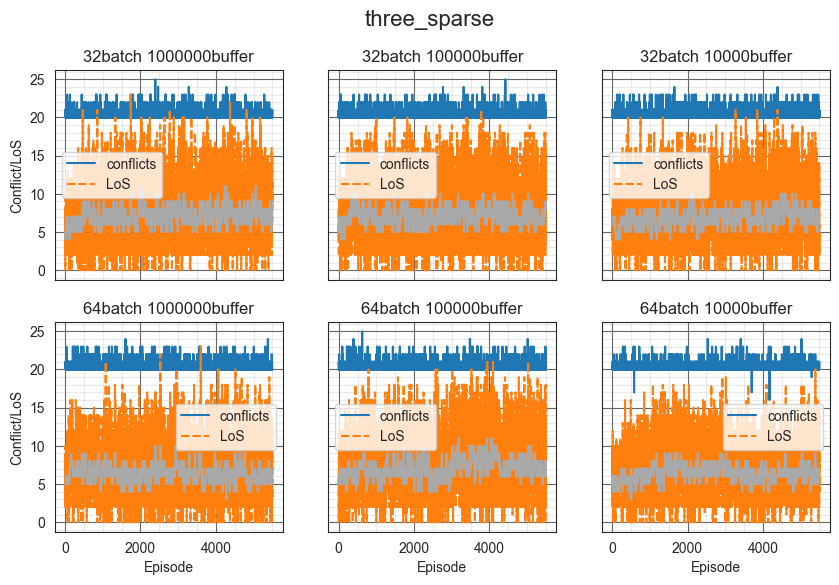

In [44]:
workdir = os.getcwd()
path = os.path.relpath('..\\..\\..\\results\\training_results\\', workdir)

two_cpa = {}
three_cpa = {}
two_lnav = {}
three_lnav = {}
two_sparse = {}
three_sparse = {}

for f in os.listdir(path):
    if os.path.isfile(os.path.join(path,f)):
        x = re.search("\d+batch", f).group()
        y = re.search("\d+buffer", f).group()
        name = x + " " + y
        if "2tran" in f:
            if "CPA" in f:
                two_cpa[name] = read_train_file(f)
            elif "LNAV" in f:
                two_lnav[name] = read_train_file(f)
            elif "SPARSE" in f:
                two_sparse[name] = read_train_file(f)
        elif "3tran" in f:
            if "CPA" in f:
                three_cpa[name] = read_train_file(f)
            elif "LNAV" in f:
                three_lnav[name] = read_train_file(f)
            elif "SPARSE" in f:
                three_sparse[name] = read_train_file(f)

loss_train("two_cpa", two_cpa)
reward_train("two_cpa", two_cpa)
action_train("two_cpa", two_cpa)
separation_train("two_cpa", two_cpa)

loss_train("two_lnav", two_lnav)
reward_train("two_lnav", two_lnav)
action_train("two_lnav", two_lnav)
separation_train("two_lnav", two_lnav)

loss_train("two_sparse", two_sparse)
reward_train("two_sparse", two_sparse)
action_train("two_sparse", two_sparse)
separation_train("two_sparse", two_sparse)

loss_train("three_cpa", three_cpa)
reward_train("three_cpa", three_cpa)
action_train("three_cpa", three_cpa)
separation_train("three_cpa", three_cpa)

loss_train("three_lnav", three_lnav)
reward_train("three_lnav", three_lnav)
action_train("three_lnav", three_lnav)
separation_train("three_lnav", three_lnav)

loss_train("three_sparse", three_sparse)
reward_train("three_sparse", three_sparse)
action_train("three_sparse", three_sparse)
separation_train("three_sparse", three_sparse)

C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\141409179.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\jeroe\AppData\Local\Temp\ipykernel_19132\141409179.py:48: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color='#999999', linestyle='-',alpha=0.2)


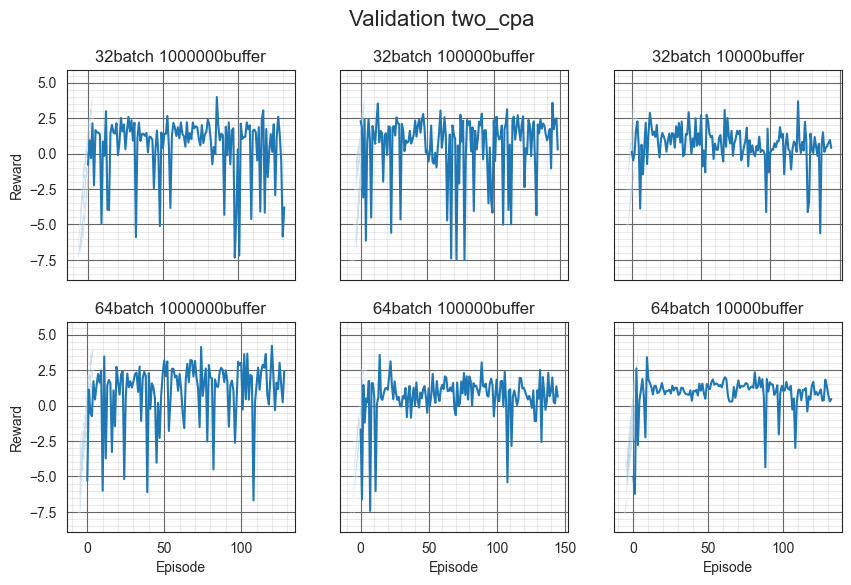

In [45]:
workdir = os.getcwd()
path = os.path.relpath('..\\..\\..\\results\\validation_results\\', workdir)

two_cpa = {}
three_cpa = {}
two_lnav = {}
three_lnav = {}
two_sparse = {}
three_sparse = {}

for f in os.listdir(path):
    if os.path.isfile(os.path.join(path,f)):
        x = re.search("\d+batch", f).group()
        y = re.search("\d+buffer", f).group()
        name = x + " " + y
        if "2tran" in f:
            if "CPA" in f:
                two_cpa[name] = read_val_file(f)
            elif "LNAV" in f:
                two_lnav[name] = read_val_file(f)
            elif "SPARSE" in f:
                two_sparse[name] = read_val_file(f)
        elif "3tran" in f:
            if "CPA" in f:
                three_cpa[name] = read_val_file(f)
            elif "LNAV" in f:
                three_lnav[name] = read_val_file(f)
            elif "SPARSE" in f:
                three_sparse[name] = read_val_file(f)

reward_val("two_cpa", two_cpa)

In [46]:
import re

workdir = os.getcwd()
path = os.path.relpath('..\\..\\..\\results\\validation_results\\', workdir)
for f in os.listdir(path):
    if os.path.isfile(os.path.join(path,f)):
        print(f)
        x = re.search("\d+batch", f).group()
        y = re.search("\d+buffer", f).group()
        if x and y:
            print(x + y)

training_results_com_2tran_CPA_10seprew_huber_32batch_1000000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv
32batch1000000buffer
training_results_com_2tran_CPA_10seprew_huber_32batch_100000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv
32batch100000buffer
training_results_com_2tran_CPA_10seprew_huber_32batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv
32batch10000buffer
training_results_com_2tran_CPA_10seprew_huber_64batch_1000000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv
64batch1000000buffer
training_results_com_2tran_CPA_10seprew_huber_64batch_100000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv
64batch100000buffer
training_results_com_2tran_CPA_10seprew_huber_64batch_10000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv
64batch10000buffer
training_results_com_2tran_LNAV_10seprew_huber_32batch_1000000buffer_1train_100update_7_5alert_0_002decay_0_01epsilon.csv
32batch1000000buffer
training_results_